# Lab 8: Define and Solve an ML Problem of Your Choosing

In [10]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time 
import tensorflow.keras as keras

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [11]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the adultDataSet, and I will be predicting the occupation of adults. The label is 'occupation.' This is a supervised learning problem, and it is a multi-class classification problem. I plan on using education, marital staus, workclass, race, gender, and hours per week as my features. This is an important problem because companies could use it to market to consumers based on their occupation. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [12]:
#dropping features
df.drop(columns='fnlwgt', inplace=True)
df.drop(columns='education', inplace=True)
df.drop(columns='relationship', inplace=True)
df.drop(columns='income_binary', inplace=True)

#finding null values
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)
df.isnull().head()

#getting rid of entries with null values
df= df.dropna()
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)


age                162
workclass         1836
education-num        0
marital-status       0
occupation        1843
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
dtype: int64
age               0
workclass         0
education-num     0
marital-status    0
occupation        0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [13]:
#one hot encoding for other features
df_encoded=pd.get_dummies(data=df, columns=['marital-status', 'workclass', 'occupation', 'race','sex_selfID', 'native-country'])
df_encoded['occupation'] = df['occupation']
string_columns = df_encoded.select_dtypes(include='object').columns
print(string_columns)
df_encoded.head()
df_encoded.columns



Index(['occupation'], dtype='object')


Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'race_Amer-Indi

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

The features I am keeping are: age, workclass, education-num, marital status, native country, race, sex, capital gains, and capital losses. 
I prepared my data by removing null values and one-hot encoding all of my categorical values. I have decided to use a neural netowrk for my model. I plan to train my model and analyze its performance by visualizing its training loss and accuracy over time. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
#importing additional packages
from sklearn.model_selection import train_test_split
import time 
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

age                               float64
education-num                       int64
capital-gain                        int64
capital-loss                        int64
hours-per-week                    float64
                                   ...   
native-country_Trinadad&Tobago      uint8
native-country_United-States        uint8
native-country_Vietnam              uint8
native-country_Yugoslavia           uint8
occupation                          int64
Length: 82, dtype: object
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
arr1 contains strings: False
Columns with string values: Index(['occupation'], dtype='object')
(20801, 81)
(8915, 81)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                5248      
_________________________________________________________________
dense_3 (Dense)              (None, 14)                910  

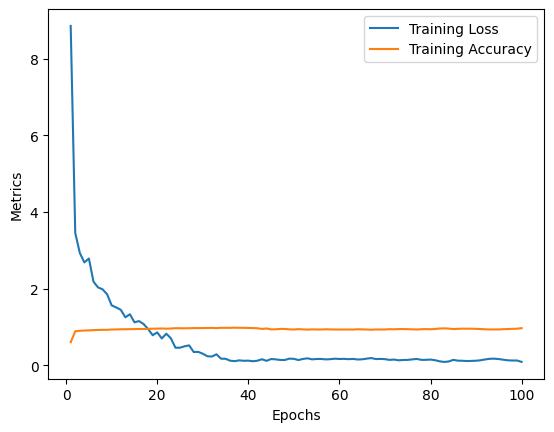

In [15]:
le = LabelEncoder()

#transform the occupation column
df_encoded['occupation'] = le.fit_transform(df_encoded['occupation'])
print(df_encoded.dtypes)
#define data sets
y = df_encoded['occupation'].to_numpy()
X = df_encoded.drop(columns = 'occupation', axis=1).to_numpy()
print(type(X))
print(type(y))

def contains_strings(arr):
    return np.issubdtype(arr.dtype, np.str_)

# Check arrays
print("arr1 contains strings:", contains_strings(X))


print("Columns with string values:", string_columns)

#creating training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
print(X_train.shape)
print(X_test.shape)
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test, num_classes=14)
y_train_one_hot = to_categorical(y_train, num_classes=14)


num_epochs=100

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))
            
#optimizer
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

# Define the model
input_shape = X_train.shape[1]
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(14, activation='softmax')  # Number of classes
])

# Compile
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

nn_model.summary()

# Ensure labels are one-hot encoded
y_train_one_hot = to_categorical(y_train, num_classes=14)
y_test_one_hot = to_categorical(y_test, num_classes=14)

# Train the model
history = nn_model.fit(
    X_train,
    y_train_one_hot,
    epochs=num_epochs,
    verbose=0,  # Disable progress bar
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=10)]
)

# Visualizing accuracy
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()



In [16]:
#calculating accuracy and loss
loss, accuracy = nn_model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Loss:  0.12201240658760071 Accuracy:  0.9669097065925598
